In [1]:
import pandas as pd

In [3]:



# Load all sheets into a dictionary of DataFrames
file_path = "ttc-bus-delay-data-2014.xlsx"
sheets_dict = pd.read_excel(file_path, sheet_name=None)

TTC_Delay_Bus_2014 = pd.concat(sheets_dict.values(), keys=sheets_dict.keys(), names=["Sheet", "Row"])
TTC_Delay_Bus_2014 = TTC_Delay_Bus_2014.reset_index(drop=True)
TTC_Delay_Bus_2014.rename(columns={'Report Date': 'Date'}, inplace=True)

TTC_Delay_Bus_2014.to_csv('TTC_Delay_Bus_2014.csv', index=False)
TTC_Delay_Bus_2014

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-01,95,00:23:00,Wednesday,York Mills station,Mechanical,10.0,20.0,E,1734.0
1,2014-01-01,102,00:55:00,Wednesday,Entire run for route,General Delay,33.0,66.0,b/w,8110.0
2,2014-01-01,54,01:28:00,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,WB,7478.0
3,2014-01-01,112,01:30:00,Wednesday,Kipling Station,Emergency Services,18.0,36.0,N,8084.0
4,2014-01-01,24,01:37:00,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,n,7843.0
...,...,...,...,...,...,...,...,...,...,...
94212,2014-12-31,96,21:52:00,Wednesday,wilson stn,Mechanical,27.0,47.0,w,1227.0
94213,2014-12-31,127,22:12:00,Wednesday,Old weston and Townsley loop,Mechanical,20.0,40.0,e/b,1582.0
94214,2014-12-31,780,22:21:00,Wednesday,Eglinton STN,Utilized Off Route,1.0,1.0,EB,7558.0
94215,2014-12-31,45,22:53:00,Wednesday,Kipling/Burnhamthorpe,Mechanical,10.0,20.0,n/b,7973.0


In [6]:



# Load all sheets into a dictionary of DataFrames
file_path = "ttc-bus-delay-data-2015.xlsx"
sheets_dict = pd.read_excel(file_path, sheet_name=None)

TTC_Delay_Bus_2015 = pd.concat(sheets_dict.values(), keys=sheets_dict.keys(), names=["Sheet", "Row"])
TTC_Delay_Bus_2015 = TTC_Delay_Bus_2015.reset_index(drop=True)
TTC_Delay_Bus_2015.rename(columns={'Report Date': 'Date'}, inplace=True)

TTC_Delay_Bus_2015.to_csv('TTC_Delay_Bus_2015.csv', index=False)
TTC_Delay_Bus_2015


,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2015-01-01,116,00:18:00,Thursday,Morningside & finch,Mechanical,10.0,20.0,WB,7667.0
1,2015-01-01,106,00:28:00,Thursday,Downsview Station,Mechanical,1.0,1.0,n,9432.0
2,2015-01-01,32,01:09:00,Thursday,Trethewey and York,Emergency Services,12.0,24.0,w/b,1640.0
3,2015-01-01,7,01:20:00,Thursday,Bathurst Station,Mechanical,12.0,24.0,n,9031.0
4,2015-01-01,32,01:26:00,Thursday,Eglinton station,Mechanical,12.0,24.0,e/b,1503.0
...,...,...,...,...,...,...,...,...,...,...
76505,2015-12-31,100,23:31:00,Thursday,Eglinton Stn,Mechanical,10.0,19.0,e/b,7644.0
76506,2015-12-31,29,23:36:00,Thursday,Wilson Station,Mechanical,9.0,18.0,NB,1732.0
76507,2015-12-31,54,23:38:00,Thursday,Eglinton Stn,Utilized Off Route,1.0,1.0,e/b,7630.0
76508,2015-12-31,52,23:48:00,Thursday,Lawrence and Culford,Mechanical,18.0,36.0,WB,1663.0


In [7]:



# Load all sheets into a dictionary of DataFrames
file_path = "ttc-bus-delay-data-2016.xlsx"
sheets_dict = pd.read_excel(file_path, sheet_name=None)

TTC_Delay_Bus_2016 = pd.concat(sheets_dict.values(), keys=sheets_dict.keys(), names=["Sheet", "Row"])
TTC_Delay_Bus_2016 = TTC_Delay_Bus_2016.reset_index(drop=True)
TTC_Delay_Bus_2016.rename(columns={'Report Date': 'Date'}, inplace=True)

TTC_Delay_Bus_2016.to_csv('TTC_Delay_Bus_2016.csv', index=False)
TTC_Delay_Bus_2016


,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2016-01-01,123,00:10:00,Friday,LONGBRANCH LOOP,Mechanical,24.0,48.0,N/B,8043.0
1,2016-01-01,112,00:25:00,Friday,KIPLING STN,Mechanical,18.0,36.0,N/B,8023.0
2,2016-01-01,736,01:03:00,Friday,ROYAL YORK AT ROMNEY RD,Investigation,20.0,40.0,N/B,8032.0
3,2016-01-01,94,01:10:00,Friday,Ossington Stn,Mechanical,10.0,20.0,SB,7745.0
4,2016-01-01,89,01:30:00,Friday,Keele Station,Mechanical,10.0,20.0,NB,1622.0
...,...,...,...,...,...,...,...,...,...,...
77083,2016-12-31,165,21:24:00,Saturday,Wilson and Jane,Diversion,1.0,1.0,w,8571.0
77084,2016-12-31,96,21:24:00,Saturday,Wilson and Jane,Diversion,1.0,1.0,e,1340.0
77085,2016-12-31,39,21:29:00,Saturday,FSTN,Utilized Off Route,20.0,28.0,EB,1301.0
77086,2016-12-31,129,21:53:00,Saturday,Progress on McCowan,Investigation,10.0,20.0,NB,1713.0


In [8]:



# Load all sheets into a dictionary of DataFrames
file_path = "ttc-bus-delay-data-2017.xlsx"
sheets_dict = pd.read_excel(file_path, sheet_name=None)

TTC_Delay_Bus_2017 = pd.concat(sheets_dict.values(), keys=sheets_dict.keys(), names=["Sheet", "Row"])
TTC_Delay_Bus_2017 = TTC_Delay_Bus_2017.reset_index(drop=True)
TTC_Delay_Bus_2017.rename(columns={'Report Date': 'Date'}, inplace=True)
TTC_Delay_Bus_2017.to_csv('TTC_Delay_Bus_2017.csv', index=False)
TTC_Delay_Bus_2017


,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2017-01-01,73,00:42:00,Sunday,Claireport at Albion,Mechanical,20.0,20.0,S,8091.0
1,2017-01-01,75,01:02:00,Sunday,Glen /Elm,Emergency Services,30.0,60.0,n,1821.0
2,2017-01-01,102,01:20:00,Sunday,Warden Station,Mechanical,10.0,20.0,NaN,8114.0
3,2017-01-01,120,01:22:00,Sunday,Sheppard at Northover,Mechanical,30.0,60.0,e,8548.0
4,2017-01-01,83,01:30:00,Sunday,Donlands station,Mechanical,30.0,60.0,NaN,8127.0
...,...,...,...,...,...,...,...,...,...,...
70298,2017-12-31,84,21:22:00,Sunday,Sheppard/Wilson heights,Investigation,10.0,20.0,E/B,8564.0
70299,2017-12-31,33,22:19:00,Sunday,Mayfair and Eglinton,Investigation,20.0,40.0,S/B,1391.0
70300,2017-12-31,39,22:22:00,Sunday,Neilson and Crow Trail,Mechanical,13.0,26.0,W/B,1085.0
70301,2017-12-31,165,23:06:00,Sunday,YKMS,Mechanical,10.0,20.0,N/B,8583.0


In [10]:
# Load all sheets into a dictionary of DataFrames
file_path = "ttc-bus-delay-data-2018.xlsx"
sheets_dict = pd.read_excel(file_path, sheet_name=None)

TTC_Delay_Bus_2018 = pd.concat(sheets_dict.values(), keys=sheets_dict.keys(), names=["Sheet", "Row"])
TTC_Delay_Bus_2018 = TTC_Delay_Bus_2018.reset_index(drop=True)
TTC_Delay_Bus_2018.rename(columns={'Report Date': 'Date'}, inplace=True)
TTC_Delay_Bus_2018.to_csv('TTC_Delay_Bus_2018.csv', index=False)
TTC_Delay_Bus_2018

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0
1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0
2,2018-01-01,28,00:30:00,Monday,Davisville Station,Investigation,30.0,60.0,S/B,8306.0
3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0
4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0
...,...,...,...,...,...,...,...,...,...,...
73922,2018-12-31,900,23:20:00,Monday,Kipling stn,Utilized Off Route,10.0,20.0,N/B,20.0
73923,2018-12-31,60,23:27:00,Monday,FSTN,Mechanical,8.0,16.0,W/B,3122.0
73924,2018-12-31,94,23:43:00,Monday,EB on Wellesley at Queenspark,Investigation,10.0,20.0,E/B,1421.0
73925,2018-12-31,52,23:48:00,Monday,Attwell and dixon,Mechanical,12.0,24.0,W/B,8333.0


In [14]:
# Load all sheets into a dictionary of DataFrames
file_path = "ttc-bus-delay-data-2019.xlsx"
sheets_dict = pd.read_excel(file_path, sheet_name=None)

TTC_Delay_Bus_2019 = pd.concat(sheets_dict.values(), keys=sheets_dict.keys(), names=["Sheet", "Row"])
TTC_Delay_Bus_2019 = TTC_Delay_Bus_2019.reset_index(drop=True)
TTC_Delay_Bus_2019.rename(columns={'Report Date': 'Date'}, inplace=True)
TTC_Delay_Bus_2019.to_csv('TTC_Delay_Bus_2019.csv', index=False)
TTC_Delay_Bus_2019

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2019-01-01,39,00:13:00,Tuesday,NECR,Mechanical,9.0,18.0,W/B,1794.0
1,2019-01-01,111,00:15:00,Tuesday,Eglington,Mechanical,15.0,30.0,S/B,8065.0
2,2019-01-01,35,00:18:00,Tuesday,Finch,Mechanical,9.0,18.0,S/B,3275.0
3,2019-01-01,25,00:30:00,Tuesday,Don Mills Rd/Eglinton Ave E,Mechanical,9.0,18.0,N/B,8840.0
4,2019-01-01,36,00:40:00,Tuesday,Humberwood,Investigation,9.0,18.0,E/B,9119.0
...,...,...,...,...,...,...,...,...,...,...
62371,2019-12-31,927,22:45:00,Tuesday,Steels Loop and Marton Grove,Mechanical,10.0,20.0,S/B,3560.0
62372,2019-12-31,34,22:50:00,Tuesday,Eglinton Station,Mechanical,10.0,20.0,EB,8685.0
62373,2019-12-31,95,23:02:00,Tuesday,Markham and Ellesmere,Mechanical,10.0,20.0,W/B,3404.0
62374,2019-12-31,32,23:24:00,Tuesday,Pine and Jane,Mechanical,11.0,22.0,E/B,1120.0


In [16]:
# Load all sheets into a dictionary of DataFrames
file_path = "ttc-bus-delay-data-2020.xlsx"
sheets_dict = pd.read_excel(file_path, sheet_name=None)

TTC_Delay_Bus_2020 = pd.concat(sheets_dict.values(), keys=sheets_dict.keys(), names=["Sheet", "Row"])
TTC_Delay_Bus_2020 = TTC_Delay_Bus_2020.reset_index(drop=True)
TTC_Delay_Bus_2020.rename(columns={'Report Date': 'Date'}, inplace=True)
TTC_Delay_Bus_2020.to_csv('TTC_Delay_Bus_2020.csv', index=False)
TTC_Delay_Bus_2020

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2020-01-01,94.0,00:01:00,Wednesday,Ossington station and Castle Frank Station,General Delay,10.0,20.0,B/W,NaN
1,2020-01-01,320.0,01:31:00,Wednesday,Yonge @ Queen,Diversion,1.0,1.0,B/W,NaN
2,2020-01-01,29.0,01:37:00,Wednesday,Dufferin loop,Mechanical,8.0,14.0,N/B,9028.0
3,2020-01-01,102.0,01:40:00,Wednesday,Warden station,Mechanical,11.0,22.0,N/B,8504.0
4,2020-01-01,68.0,01:42:00,Wednesday,Warden Station,Mechanical,8.0,23.0,N/B,8721.0
...,...,...,...,...,...,...,...,...,...,...
36146,2020-12-31,36.0,23:44,Thursday,FINCH AND ISLINGTON,Security,10.0,20.0,W,3298.0
36147,2020-12-31,43.0,00:32,Thursday,KENNEDY STATION,Security,14.0,28.0,NaN,8706.0
36148,2020-12-31,86.0,01:08,Thursday,MEADOWVALE AND SHEPPAR,Emergency Services,10.0,20.0,E,8899.0
36149,2020-12-31,76.0,01:23,Thursday,LAKE SHORE AND MIMICO,Road Blocked - NON-TTC Collision,86.0,101.0,NaN,0.0


In [19]:
# Load all sheets into a dictionary of DataFrames
file_path = "ttc-bus-delay-data-2021.xlsx"
sheets_dict = pd.read_excel(file_path, sheet_name=None)

TTC_Delay_Bus_2021 = pd.concat(sheets_dict.values(), keys=sheets_dict.keys(), names=["Sheet", "Row"])
TTC_Delay_Bus_2021 = TTC_Delay_Bus_2021.reset_index(drop=True)
TTC_Delay_Bus_2021.to_csv('TTC_Delay_Bus_2021.csv', index=False)
TTC_Delay_Bus_2021

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2021-01-01,320,04:26,Friday,YONGE AND STEELES,Emergency Services,0,0,N,1553
1,2021-01-01,63,05:04,Friday,CANNIFF AND STRACHAN,Mechanical,10,0,N,8144
2,2021-01-01,42,05:34,Friday,WILSON GARAGE,Mechanical,24,48,N,8365
3,2021-01-01,320,05:44,Friday,YONGE AND STEELES,Emergency Services,15,30,N,8181
4,2021-01-01,35,06:21,Friday,JANE STATION,Vision,30,60,E,3186
...,...,...,...,...,...,...,...,...,...,...
42264,2021-12-31,396,01:15,Friday,STEELES AND MARTIN GRO,Operations - Operator,30,60,E,0
42265,2021-12-31,960,01:16,Friday,SIGNAL AND STEELES,Operations - Operator,6,12,NaN,8211
42266,2021-12-31,32,01:17,Friday,EGLINTON WEST STATION,Operations - Operator,10,18,NaN,1357
42267,2021-12-31,29,01:20,Friday,WILSON STATION,Operations - Operator,6,11,NaN,9044


In [21]:
TTC_Delay_Bus_2022 = pd.read_excel('ttc-bus-delay-data-2022.xlsx')
TTC_Delay_Bus_2022.to_csv('TTC_Delay_Bus_2022.csv', index=False)
TTC_Delay_Bus_2022

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658
2,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0
3,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0
4,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0
...,...,...,...,...,...,...,...,...,...,...
58702,2022-12-31,32,23:21,Saturday,EGLINTON AND EDITH (W,Mechanical,2,24,W,1085
58703,2022-12-31,113,23:28,Saturday,DANFORTH AND DAWES,Vision,20,40,W,8589
58704,2022-12-31,72,23:56,Saturday,LOWER SHERBOURNE AND L,Security,18,36,N,8493
58705,2022-12-31,22,00:17,Saturday,BINGHAM LOOP,Cleaning - Unsanitary,10,20,S,8582


In [22]:
TTC_Delay_Bus_2023 = pd.read_excel('ttc-bus-delay-data-2023.xlsx')
TTC_Delay_Bus_2023.to_csv('TTC_Delay_Bus_2023.csv', index=False)
TTC_Delay_Bus_2023

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2023-01-01,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772
1,2023-01-01,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
2,2023-01-01,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
3,2023-01-01,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334
4,2023-01-01,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559
...,...,...,...,...,...,...,...,...,...,...
56202,2023-12-31,41,01:26,Sunday,KEELE AND EGLINTON,Operations - Operator,28,53,N,1133
56203,2023-12-31,94,01:31,Sunday,CASTLE FRANK STATION,Emergency Services,10,20,NaN,8415
56204,2023-12-31,63,01:40,Sunday,OAKWOOD AND VAUGHAN,Diversion,33,43,N,7010
56205,2023-12-31,34,01:54,Sunday,EGLINTON STATION,Emergency Services,0,0,N,8761


In [23]:
TTC_Delay_Bus_2024 = pd.read_excel('ttc-bus-delay-data-2024.xlsx')
TTC_Delay_Bus_2024.to_csv('TTC_Delay_Bus_2024.csv', index=False)
TTC_Delay_Bus_2024

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2024-01-01,89,02:08,Monday,KEELE AND GLENLAKE,Vision,10,20,N,7107
1,2024-01-01,39,02:30,Monday,FINCH STATION,General Delay,20,40,NaN,8914
2,2024-01-01,300,03:13,Monday,BLOOR AND MANNING,General Delay,0,0,NaN,8562
3,2024-01-01,65,03:23,Monday,PARLIAMENT AND BLOOR,Security,0,0,N,8574
4,2024-01-01,113,03:37,Monday,MAIN STATION,Security,0,0,NaN,8541
...,...,...,...,...,...,...,...,...,...,...
54604,2024-11-30,927,01:05,Saturday,ARROW GARAGE,Operations - Operator,20,40,NaN,0
54605,2024-11-30,904,01:13,Saturday,PROGRESS AND MIDLAND,Operations - Operator,7,14,W,9047
54606,2024-11-30,105,01:14,Saturday,SHEPPARD WEST STATION,Emergency Services,0,0,S,7104
54607,2024-11-30,36,01:19,Saturday,HUMBERWOOD BLVD AND MO,Emergency Services,15,29,S,3627


In [57]:
import pandas as pd
import glob

# List all CSV files from 2014 to 2024
file_paths = [f"TTC_Delay_Bus_{year}.csv" for year in range(2014, 2025)]

# Read and combine all files
df_list = [pd.read_csv(file) for file in file_paths]
df = pd.concat(df_list, ignore_index=True)


# Convert 'Date' column to datetime format (assuming 'Date' exists)
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Define a function to assign seasons
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# Apply the function to create a 'Season' column
df['Season'] = df['Month'].apply(get_season)
df = df[df['Min Delay']>0]


# Remove rows where 'Route' is NaN
df = df.dropna(subset=['Route', 'Incident'])

# Reset index after dropping rows
df = df.reset_index(drop=True)


# List of columns to drop
columns_to_drop = ['Vehicle', 'Location']  # Replace with actual column names


# Drop the selected columns
df = df.drop(columns=columns_to_drop)


df = df[df['Incident']!='e']
df = df[df['Incident']!='Roadblock by Collision - Non-TTC']
df = df[df['Incident']!='Late Entering Service - Mechanical']
df = df[df['Incident']!='Securitty']
df = df[df['Incident']!='Late Leaving Garage - Operations']
df = df[df['Incident']!='Rail/Switches']
df = df[df['Incident']!='Late']
df = df[df['Incident']!='e']
# Display first few rows


df = df.reset_index(drop=True)


df


,Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Year,Month,Season
0,2014-01-01,95,00:23:00,Wednesday,Mechanical,10.0,20.0,E,2014,1,Winter
1,2014-01-01,102,00:55:00,Wednesday,General Delay,33.0,66.0,b/w,2014,1,Winter
2,2014-01-01,54,01:28:00,Wednesday,Mechanical,10.0,20.0,WB,2014,1,Winter
3,2014-01-01,112,01:30:00,Wednesday,Emergency Services,18.0,36.0,N,2014,1,Winter
4,2014-01-01,24,01:37:00,Wednesday,Investigation,10.0,20.0,n,2014,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...
678668,2024-11-30,133,00:45,Saturday,Utilized Off Route,25.0,50.0,NaN,2024,11,Fall
678669,2024-11-30,927,01:05,Saturday,Operations - Operator,20.0,40.0,NaN,2024,11,Fall
678670,2024-11-30,904,01:13,Saturday,Operations - Operator,7.0,14.0,W,2024,11,Fall
678671,2024-11-30,36,01:19,Saturday,Emergency Services,15.0,29.0,S,2024,11,Fall


In [58]:
df['Incident'].value_counts()

Incident
Mechanical                          242968
Utilized Off Route                   85215
General Delay                        74019
Late Leaving Garage                  64559
Investigation                        49824
Operations - Operator                49124
Diversion                            38313
Emergency Services                   18498
Security                             12948
Collision - TTC                      12638
Cleaning                             10827
Cleaning - Unsanitary                 6363
Vision                                4854
Road Blocked - NON-TTC Collision      2414
Late Leaving Garage - Mechanical      1840
Late Leaving Garage - Operator        1694
Operations                            1094
Held By                                498
Late Leaving Garage - Management       476
Late Leaving Garage - Vision           167
Cleaning - Disinfection                 88
Collision - TTC Involved                84
Management                              61
La

In [48]:
df[df['Incident']!='e']

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Year,Month,Season
0,2014-01-01,95,00:23:00,Wednesday,York Mills station,Mechanical,10.0,20.0,E,1734.0,2014,1,Winter
1,2014-01-01,102,00:55:00,Wednesday,Entire run for route,General Delay,33.0,66.0,b/w,8110.0,2014,1,Winter
2,2014-01-01,54,01:28:00,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,WB,7478.0,2014,1,Winter
3,2014-01-01,112,01:30:00,Wednesday,Kipling Station,Emergency Services,18.0,36.0,N,8084.0,2014,1,Winter
4,2014-01-01,24,01:37:00,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,n,7843.0,2014,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678700,2024-11-30,133,00:45,Saturday,KENNEDY STATION,Utilized Off Route,25.0,50.0,NaN,1579.0,2024,11,Fall
678701,2024-11-30,927,01:05,Saturday,ARROW GARAGE,Operations - Operator,20.0,40.0,NaN,0.0,2024,11,Fall
678702,2024-11-30,904,01:13,Saturday,PROGRESS AND MIDLAND,Operations - Operator,7.0,14.0,W,9047.0,2024,11,Fall
678703,2024-11-30,36,01:19,Saturday,HUMBERWOOD BLVD AND MO,Emergency Services,15.0,29.0,S,3627.0,2024,11,Fall


In [32]:
import pandas as pd

# Ensure 'Date' is in datetime format
TTC_Delay_BUS.loc[:, 'Date'] = pd.to_datetime(TTC_Delay_BUS['Date'])

# Create the 'Weekday' column (0=Monday, 6=Sunday)
TTC_Delay_BUS.loc[:, 'Weekday'] = TTC_Delay_BUS['Date'].dt.day_name()

# Create the 'Month' column (1=January, 12=December)
TTC_Delay_BUS.loc[:, 'Month'] = TTC_Delay_BUS['Date'].dt.month_name()

# Create the 'Season' column (based on month ranges)
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'

TTC_Delay_BUS.loc[:, 'Season'] = TTC_Delay_BUS['Month'].apply(get_season)

# Create the 'Time of Day' column based on the 'Time' column
# First, ensure 'Time' is in datetime format
TTC_Delay_BUS.loc[:, 'Time'] = pd.to_datetime(TTC_Delay_BUS['Time'], format='%H:%M').dt.time



# Display the updated DataFrame
TTC_Delay_BUS

/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_73548/1580831625.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTC_Delay_BUS.loc[:, 'Weekday'] = TTC_Delay_BUS['Date'].dt.day_name()
/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_73548/1580831625.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTC_Delay_BUS.loc[:, 'Month'] = TTC_Delay_BUS['Date'].dt.month_name()
/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_73548/1580831625.py:23: SettingWithCopyWarning: 
A value

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Weekday,Month,Season
2,2024-01-01,02:08:00,Monday,DUNDAS STATION,MUPAA,4,10,N,YU,6051,Monday,January,Winter
3,2024-01-01,02:13:00,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284,Monday,January,Winter
4,2024-01-01,02:22:00,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986,Monday,January,Winter
5,2024-01-01,02:25:00,Monday,ST CLAIR STATION,MUPAA,3,9,N,YU,6051,Monday,January,Winter
7,2024-01-01,02:27:00,Monday,WOODBINE STATION,EUDO,7,13,E,BD,5077,Monday,January,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24103,2024-11-30,22:03:00,Saturday,ST CLAIR WEST STATION,MUPAA,3,8,N,YU,5601,Saturday,November,Fall
24107,2024-11-30,22:50:00,Saturday,BLOOR STATION,MUIR,5,11,N,YU,5491,Saturday,November,Fall
24111,2024-11-30,00:14:00,Saturday,KIPLING STATION,MUESA,6,12,E,BD,5040,Saturday,November,Fall
24114,2024-11-30,00:35:00,Saturday,LAWRENCE STATION,SUO,5,11,S,YU,5956,Saturday,November,Fall


In [34]:
TTC_Delay_BUS['Code'].unique()

array(['MUPAA', 'PUTDN', 'EUDO', 'MUI', 'MUIR', 'SUDP', 'TUNOA', 'TUNIP',
       'PUOPO', 'SUO', 'TUSC', 'MUDD', 'MUNOA', 'MUO', 'MUSAN', 'EUME',
       'TUO', 'SUEAS', 'TUS', 'EUVE', 'EUCA', 'MUPR1', 'PUSAC', 'EUPI',
       'MUTO', 'PUSSW', 'PUSRA', 'MUATC', 'TUMVS', 'MUIRS', 'MUSC',
       'EUBK', 'SUAE', 'SUUT', 'PUSI', 'MUIS', 'PUSCR', 'MUD', 'EUAC',
       'TUSET', 'SUROB', 'MUFS', 'TUATC', 'EUNT', 'SUG', 'EUSC', 'PUTO',
       'SUPOL', 'PUSIS', 'SUSA', 'EUCD', 'PUTWZ', 'SUAP', 'EUYRD', 'TUOS',
       'MUPLB', 'MUWR', 'PUTR', 'PUSTS', 'MUCL', 'EUAL', 'EUVA', 'EUATC',
       'PUTIS', 'TUCC', 'TUSUP', 'PUSO', 'EUTRD', 'PUSNT', 'PUTOE',
       'PUSTC', 'TUOPO', 'EUCO', 'EUBO', 'EUOE', 'EUO', 'PUATC', 'MUWEA',
       'MUTD', 'EUTR', 'SUSP', 'PUMO', 'MUPF', 'PUTSM', 'EUNEA', 'SUBT',
       'TUKEY', 'EUOPO', 'PUEO', 'TUML', 'PUCSC', 'EUECD', 'EULV',
       'PUSWZ', 'PUEME', 'PUCSS', 'PUTS', 'EULT', 'PUTD', 'EUTM', 'MUIE',
       'EUTL', 'PUTIJ', 'PUEWZ', 'MUPLA', 'PUSCA', 'TUDOE', 'PUTT

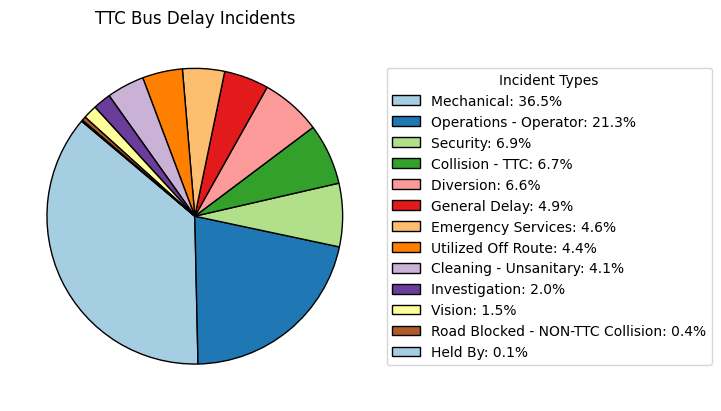

In [27]:
import matplotlib.pyplot as plt

# Count occurrences of each incident type
incident_counts = TTC_Delay_BUS['Incident'].value_counts()
labels = incident_counts.index
sizes = incident_counts.values

# Create pie chart

wedges, texts = plt.pie(
    sizes, startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'}
)

# Create legend with labels and percentages
legend_labels = [f"{label}: {size/sum(sizes)*100:.1f}%" for label, size in zip(labels, sizes)]
plt.legend(wedges, legend_labels, title="Incident Types", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('TTC Bus Delay Incidents')
plt.show()


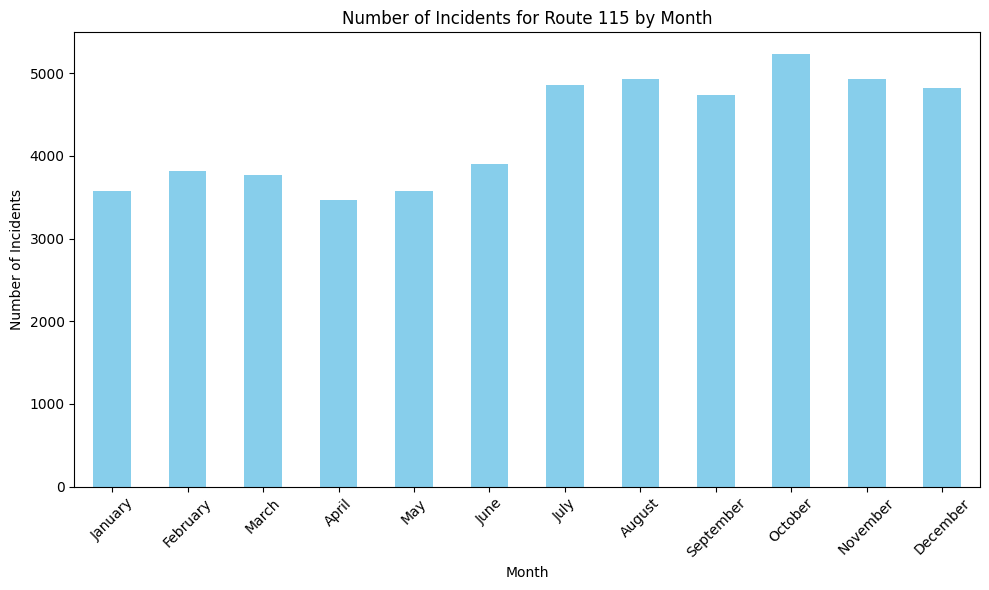

In [28]:
import matplotlib.pyplot as plt

# Filter the DataFrame for Route 41
route_41_data = TTC_Delay_BUS[TTC_Delay_BUS['Route'] == 52]
route_41_data = TTC_Delay_BUS.copy()
# Count the number of occurrences for each Month
date_counts = route_41_data.groupby('Month').size()

# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']

# Reindex the counts to ensure the months are sorted correctly
date_counts = date_counts.reindex(month_order)

# Plot the result
plt.figure(figsize=(10, 6))
date_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Incidents for Route 115 by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
route_count = TTC_Delay_BUS.groupby('Route').size().reset_index(name='Incident Count')

route_count_sorted = route_count.sort_values(by='Incident Count', ascending=False)

# Display the sorted result
route_count_sorted.head(40)



,Route,Incident Count
26,32,1541
46,52,1452
30,36,1329
29,35,1189
23,29,1172
56,63,971
88,95,901
95,102,894
78,85,864
48,54,786
